In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
#Data preprocessing

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\likhitha\Data set\training',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\likhitha\Data set\testing',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [6]:
#Build CNN model

#Initalize

cnn=tf.keras.models.Sequential()

In [7]:
#Convolution

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [8]:
#pooling


cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
#Add 1 more layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
#flatten

cnn.add(tf.keras.layers.Flatten())

In [11]:
#Full connection

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [12]:
#output layer

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))   #activation will be sigmoid because last layer will be binary 
                                                               #classification so only 2 class will be present.
                                                               #if output is more than 2 then we will aply softmax.

In [13]:
#Compile the model

cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Train the model

history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=20)

Epoch 1/20
725/782 [==========================>...] - ETA: 12s - loss: 0.6042 - accuracy: 0.6643

C:\Users\likhitha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\likhitha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\likhitha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\likhitha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\likhitha\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\likhitha\anaconda3\lib\site-pa

782/782 [==============================] - 294s 376ms/step - loss: 0.6008 - accuracy: 0.6681 - val_loss: 0.5053 - val_accuracy: 0.7559
Epoch 2/20
782/782 [==============================] - 290s 371ms/step - loss: 0.5117 - accuracy: 0.7482 - val_loss: 0.4465 - val_accuracy: 0.7889
Epoch 3/20
782/782 [==============================] - 297s 380ms/step - loss: 0.4666 - accuracy: 0.7770 - val_loss: 0.4264 - val_accuracy: 0.8006
Epoch 4/20
782/782 [==============================] - 957s 1s/step - loss: 0.4416 - accuracy: 0.7931 - val_loss: 0.4065 - val_accuracy: 0.8147
Epoch 5/20
782/782 [==============================] - 327s 419ms/step - loss: 0.4243 - accuracy: 0.8032 - val_loss: 0.3847 - val_accuracy: 0.8302
Epoch 6/20
782/782 [==============================] - 347s 444ms/step - loss: 0.4025 - accuracy: 0.8150 - val_loss: 0.3677 - val_accuracy: 0.8338
Epoch 7/20
782/782 [==============================] - 317s 405ms/step - loss: 0.3874 - accuracy: 0.8245 - val_loss: 0.3336 - val_accuracy:

In [60]:
import numpy as np 
from keras.preprocessing import image 
test_image=image.load_img(r"C:\Users\likhitha\Data set\single_prediction\58.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices

if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [61]:

prediction

'cat'

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


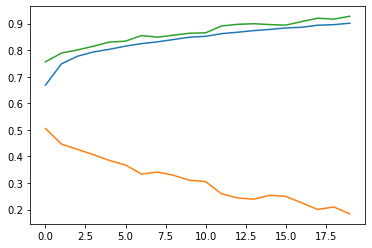

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])